# Exercise 11-1: Create a multiple regression

## Import the data

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
fish = pd.read_csv('Fish.csv')

In [6]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Clean the data

In [7]:
# read the info.txt file and rename the Length columns so they're more descriptive

with open('info.txt') as file:
    info = file.read()

fish = fish.rename(columns={
    'Length1': 'VerticalLength',
    'Length2': 'DiagonalLength',
    'Length3': 'CrossLength'
})

fish.head()

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Identify a correlation

In [8]:
# get the correlation data for the Weight column

# Because Species's variable is string which is meaningless to transfer to float so that we set as dummy variable
species_dummies = pd.get_dummies(fish['Species'], prefix='Species')

# Add dummy variable into dataframe
data_with_dummies = pd.concat([fish, species_dummies], axis=1)

# Drop original 'Species' for data cleaning
species_column = data_with_dummies['Species'].copy()

data_with_dummies.drop('Species', axis=1, inplace=True)

# Correlation matrix for the answer
correlation_matrix = data_with_dummies.corr()

# 打印与 'Weight' 列相关的相关性数据
print(correlation_matrix['Weight'])

Weight               1.000000
VerticalLength       0.915712
DiagonalLength       0.918618
CrossLength          0.923044
Height               0.724345
Width                0.886507
Species_Bream        0.326795
Species_Parkki      -0.186034
Species_Perch       -0.033240
Species_Pike         0.310641
Species_Roach       -0.261784
Species_Smelt       -0.337109
Species_Whitefish    0.073625
Name: Weight, dtype: float64


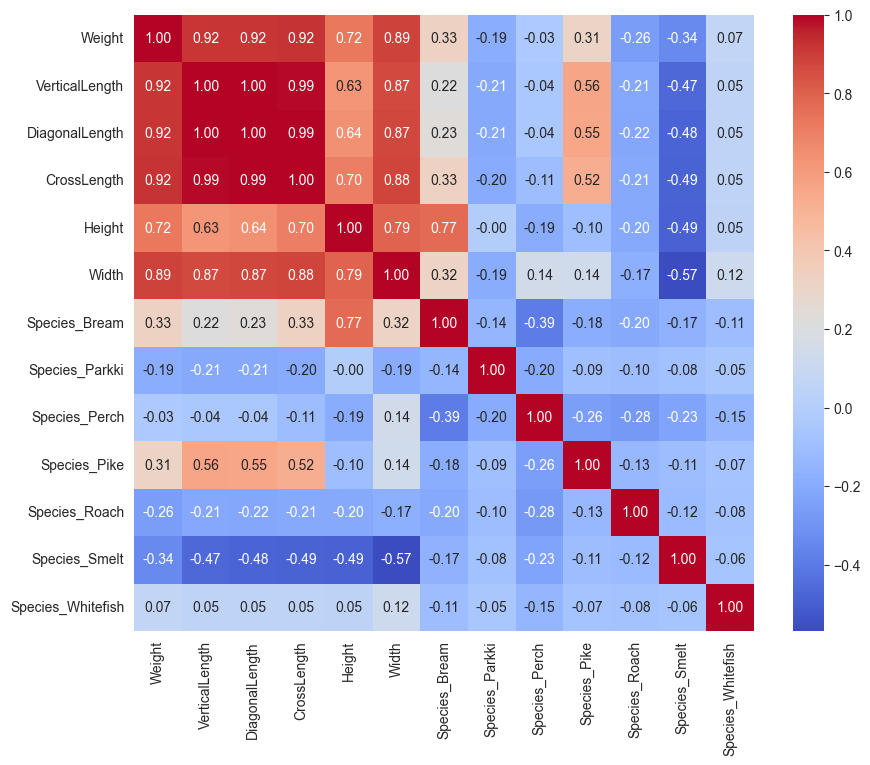

In [9]:
# create a heatmap for the correlation data

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.show()


## Create a multiple regression model

In [10]:
# filter the data so it only contains the values for the Bream species 
# and assign the resulting DataFrame to a variable named bream
data_with_dummies['Species'] = species_column
Bream = data_with_dummies[data_with_dummies['Species'] == 'Bream']
print(Bream)

    Weight  VerticalLength  DiagonalLength  CrossLength   Height   Width  \
0    242.0            23.2            25.4         30.0  11.5200  4.0200   
1    290.0            24.0            26.3         31.2  12.4800  4.3056   
2    340.0            23.9            26.5         31.1  12.3778  4.6961   
3    363.0            26.3            29.0         33.5  12.7300  4.4555   
4    430.0            26.5            29.0         34.0  12.4440  5.1340   
5    450.0            26.8            29.7         34.7  13.6024  4.9274   
6    500.0            26.8            29.7         34.5  14.1795  5.2785   
7    390.0            27.6            30.0         35.0  12.6700  4.6900   
8    450.0            27.6            30.0         35.1  14.0049  4.8438   
9    500.0            28.5            30.7         36.2  14.2266  4.9594   
10   475.0            28.4            31.0         36.2  14.2628  5.1042   
11   500.0            28.7            31.0         36.2  14.3714  4.8146   
12   500.0  

In [11]:
# split the training and test data
X = Bream.drop('Weight', axis=1)  # weight is target variable
X.drop('Species', axis=1, inplace=True)
y = Bream['Weight']  #
# split the training and test data with 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)# 提供一个随机种子

In [12]:
# create the model and fit the training data
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [13]:
# score the testing data
model.score(X_test, y_test)

0.8014040082620604

In [14]:
# make the predictions
y_pred = model.predict(X_test)

# 创建一个新的 DataFrame 存储预测结果
# 假设 X_test 已经包含了需要的测试特征信息
predictions_df = X_test.copy()
predictions_df['Predicted_Weight'] = y_pred

# 查看预测结果的 DataFrame
print(predictions_df.head())

    VerticalLength  DiagonalLength  CrossLength   Height   Width  \
26            32.0            35.0         40.6  16.3618  6.0900   
13            29.5            32.0         37.3  13.9129  5.0728   
24            31.9            35.0         40.5  16.2405  5.5890   
21            31.4            34.0         39.2  15.9936  5.3704   
15            29.4            32.0         37.2  15.4380  5.5800   

    Species_Bream  Species_Parkki  Species_Perch  Species_Pike  Species_Roach  \
26           True           False          False         False          False   
13           True           False          False         False          False   
24           True           False          False         False          False   
21           True           False          False         False          False   
15           True           False          False         False          False   

    Species_Smelt  Species_Whitefish  Predicted_Weight  
26          False              False        742

In [15]:
# join the predicted data with the original data
predictions_df = X_test.copy()
predictions_df['Predicted_Weight'] = y_pred  # 添加预测结果列

# 将实际值列也加入到 DataFrame 中
predictions_df['Actual_Weight'] = y_test

# 将结果赋值给 final 变量
final = predictions_df

# 查看结果
print(final.head())

    VerticalLength  DiagonalLength  CrossLength   Height   Width  \
26            32.0            35.0         40.6  16.3618  6.0900   
13            29.5            32.0         37.3  13.9129  5.0728   
24            31.9            35.0         40.5  16.2405  5.5890   
21            31.4            34.0         39.2  15.9936  5.3704   
15            29.4            32.0         37.2  15.4380  5.5800   

    Species_Bream  Species_Parkki  Species_Perch  Species_Pike  Species_Roach  \
26           True           False          False         False          False   
13           True           False          False         False          False   
24           True           False          False         False          False   
21           True           False          False         False          False   
15           True           False          False         False          False   

    Species_Smelt  Species_Whitefish  Predicted_Weight  Actual_Weight  
26          False              F

## Plot the residuals

In [16]:
# calculate the residuals and store them in a column
final['Residuals'] = final['Actual_Weight'] - final['Predicted_Weight']

# 查看包含残差的 DataFrame
print(final.head())

    VerticalLength  DiagonalLength  CrossLength   Height   Width  \
26            32.0            35.0         40.6  16.3618  6.0900   
13            29.5            32.0         37.3  13.9129  5.0728   
24            31.9            35.0         40.5  16.2405  5.5890   
21            31.4            34.0         39.2  15.9936  5.3704   
15            29.4            32.0         37.2  15.4380  5.5800   

    Species_Bream  Species_Parkki  Species_Perch  Species_Pike  Species_Roach  \
26           True           False          False         False          False   
13           True           False          False         False          False   
24           True           False          False         False          False   
21           True           False          False         False          False   
15           True           False          False         False          False   

    Species_Smelt  Species_Whitefish  Predicted_Weight  Actual_Weight  \
26          False              

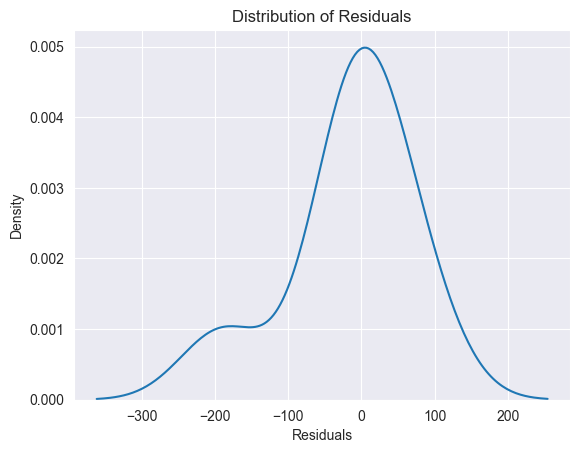

In [17]:
# create a KDE plot for the residuals
# sns.set(style='whitegrid')

# 创建残差的分布图
# sns.displot(final['Residuals'], kde=True, height=6, aspect=1.5)
sns.kdeplot(final['Residuals'])
# 添加图形标题和标签
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Weight')

plt.show()